# Python for Librarians - Week 3 Workalong

We are going to continue to built on last week's work by continuing our examination of Pandas. Then we will spend some time creating graphs using a Python library called [MatPlotLib](https://matplotlib.org/).

In terms of our data, for for this week we are going to look up some SciHub usage data and compare the usage from two large Candian cities: Toronto and Montreal. Every once in a while SciHub will publish anonymized usage data with some geographic information associated with it. Our task will be to evaluate that data to see if we can find any interesting comparisons. This dataset is a truncated version of what is found [here](https://datadryad.org/stash/dataset/doi:10.5061/dryad.q447c). As we saw in our readings for this week this dataset has been analyzed by a researcher who published results in the  journal called _Science_.

Topics we'll be exploring

- The Pandas Library
- Graphing with MatplotLib

## Loading our Libraries

Line 1 should look familar. Line 3 & 4 will load up Matplotlib. In particular we need to include line 4 because we are working within a Jupyter Notebook. (We don't need to know exact details of why this is necessary, in case you are curious this [page](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline) will explain it)

In [ ]:
import pandas
#We `import as plt` just like we did with Pandas to make it so we have to type less 
import matplotlib.pyplot as plt
%matplotlib inline

Our dataset already has column information so we don't need to add that. We just use Pandas to load up the CSV file.

In [ ]:
sci_hub_data = pandas.read_csv("https://raw.githubusercontent.com/elibtronic/lja_datasets/master/week_3_sci_hub_worksheet.csv")

Run the following cell a few times to display different random samples of 20 rows to get a sense of what is in the dataset.

In [ ]:
sci_hub_data.sample(20)

Here's a brief description of the columns
- **timestamp** date and time of the SciHub Access
- **user_id** an anoymized label to gather all of the usage from the same user into a identifier that doesn't identify them directly
- **doi_whole** The complete DOI of the item that was downloaded from SciHub
- **doi_prefix** The prefix of the DOI. This value allows us determine which source originally published this article
- **doi_suffix** The suffix of the DOI. Or in other words the complete DOI the the prefix removed.

(More details on how a DOI is [constructed](https://www.crossref.org/education/member-setup/constructing-your-dois/) in case you're interested.)

## Question 1 
Can you **describe** the dataframe?

In [ ]:
sci_hub_data

In this case there is not a lot quantitiative data we get out of calling this function on the dataframe. Contrast this to what we saw with the San Francisco data we saw in week 2.

Let's take a look at how this data is split. Or in other words, how many rows are Montreal usage, how many are Toronto usage.

In [ ]:
# How is the data split?
sci_hub_data.groupby("city")["doi_whole"].count()

## Question 2

How many unique publishers are in this dataset? (Hint: each unique prefix will indicate another Publisher in this data)

In [ ]:
# How mandy unique publishers are in the data?
sci_hub_data[].nunique()

## Question 3

How many unique users are in this dataset?

In [ ]:
# unique users
sci_hub_data[].nunique()

## Brief comparisons

The next two cells will give us some details about downloads per publisher for Toronto and Montreal.


In [ ]:
#Here are selected a subset of data (with sci_hub_data["city"] == "Toronto" )
#We group those results by doi_prefix and then apply .count() to get the total count instead of
#each line that matches the query
sci_hub_data[sci_hub_data["city"] == "Toronto"].groupby("doi_prefix").count()

In [ ]:
#Top publishers in Montreal
#same rationale as the cell above but with Montreal in the selection criteria
sci_hub_data[sci_hub_data["city"] == "Montreal"].groupby("doi_prefix").count()

## Sorting 

The previous couple of cells were great to group the data but everything was ordered by **doi_prefix**. Say we want to sort our lists of publishers so we got the topic ten entries for each city. We can sort by adding:

```
.sort_values(by=COLUMNNAME,ascending=False)
```

to our dataframe where `COLUMNNAME` is the name of the column we want to sort by. If we want to list from smallest to largest we change the second part to `ascending=True`

We'll also just grab the top ten results in our sorted by adding `head(10)` to our search. As we see above there are many publishers that only show up once or twice. We want just the top 10 occuring publishers.

The code in the following cell is broken up over a few lines just to make it easier to read. I'm using that `\` notation to accomplish this. We certainly don't need to do this.

In [ ]:
#Top 10 in Toronto
#We apply our new sort_values function
#we finally apply .head(10) to just get the top ten lines of results
sci_hub_data[sci_hub_data["city"] == "Toronto"]\
            .groupby("doi_prefix")\
            .count()\
            .sort_values(by='user_id',ascending=False)\
            .head(10)

In [ ]:
#Top 10 in Montreal
#Same as above but with Montreal data
sci_hub_data[sci_hub_data["city"] == "Montreal"].groupby("doi_prefix").count().sort_values(by='user_id',ascending=False).head(10)

Hmmm. Interesting the top downloaded publisher in both cities is **10.1016**

### Important detail!

We sort by the `user_id` column in the previous examples because we want to count how many times each publisher shows up in the data, not just count each line in our sort. That's a subtle difference I know. 

Experiement with changing `user_id` to different columns in the examples to solidify your understanding of this.

## Visualizing some results

We are starting to get a sense of what the data has in it but let's see if we can create some visualizations. Enter Matplotlib. We are going to create some smaller pandas dataframes to make our data easier to read when we graph it. Load the following cell so that we make the example below a bit easier to read.

In [ ]:
toronto_users = sci_hub_data[sci_hub_data["city"] == "Toronto"]
montreal_users = sci_hub_data[sci_hub_data["city"] == "Montreal"]

## Everybody loves pie!

Let's start with a [Pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) graph. Try to read through the code in the cell below before clicking the play button to run it.

In [ ]:
#Data we want to use for our pie graph
toronto_slice = toronto_users["user_id"].count()
montreal_slice = montreal_users["user_id"].count()

#We provide a list of all the values we want in our pie graph
pie_data = [toronto_slice,montreal_slice]

#We tell Matplot lib to draw a pie with our data
plt.pie(pie_data)

#We'll always end with this, this tells matplotlib we are ready to draw the graph
plt.show()

## A Fancier pie 

Looks good but we are missing some labels. Compare the above MatPlotLib pie graph to the following to see what we have added. The general flow looks the same for any graph we make with MatPlotLib.

In [ ]:
toronto_slice = toronto_users["user_id"].count()
montreal_slice = montreal_users["user_id"].count()

pie_data = [toronto_slice,montreal_slice]

#Labels for Pie graph as a list
pie_labels = ["Toronto","Montreal"]

#Just as before but this time we add labels=pie_labels to add labels
plt.pie(pie_data,labels=pie_labels)

#Nifty title to describe to our pie
plt.title("Toronto versus Montreal Downloads")

#Generate the pie
plt.show()

## Complex pies

Let's draw a pie of the top 10 publishers downloaded in Toronto. Let's start by getting just the name and download counts (this should look familar to our example from earlier) we just add `["user_id"]` at the end of our statement to just get the values.


In [ ]:
toronto_top_publishers = sci_hub_data[sci_hub_data["city"] == "Toronto"].groupby("doi_prefix")\
                            .count()\
                            .sort_values(by='user_id',ascending=False)\
                            .head(10)["user_id"]

toronto_top_publishers

`toronto_top_publishers` is a Pandas Series which operates just like a dictionary! We can access the the two parts as illustrated in the following cell

In [16]:
#the publisher DOI prefix is stored in the index
print("Publisher Info")
for i in toronto_top_publishers.index:
    print(i)

print("------")
print("Counts")
#the count associated with each publisher is stored in the data field
for i in toronto_top_publishers.values:
    print(i)

Publisher Info
10.1016
10.1007
10.1038
10.2307
10.108
10.1002
10.1021
10.1111
10.1109
10.1177
------
Counts
3951
1665
1536
917
804
782
780
767
684
375


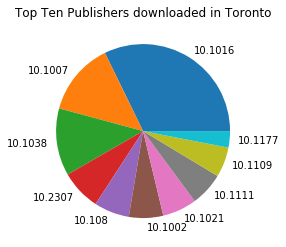

In [21]:
## Finally, let's make our Pie

plt.pie(toronto_top_publishers.values, labels=toronto_top_publishers.index)

plt.title("Top Ten Publishers downloaded in Toronto")
plt.show()

## Question 4

See if you can now replicate this for the Montreal data in the next cell. You just need to modify lines 6 & 8

In [ ]:
montreal_top_publishers = sci_hub_data[sci_hub_data["city"] == "Montreal"].groupby("doi_prefix")\
                            .count()\
                            .sort_values(by='user_id',ascending=False)\
                            .head(10)["user_id"]

plt.pie(, labels=.index)

plt.title("")
plt.show()

## Histograms

The last topic for this week's work is [histograms](https://en.wikipedia.org/wiki/Histogram). They are great because they show us how often values land within a certain range. These ranges are often called bins or buckets. Check out the short write-up on [Kahn](https://www.khanacademy.org/math/statistics-probability/displaying-describing-data/quantitative-data-graphs/a/histograms-review) to brush up on these details if you need.

In the next example we are going to create a historgram of how many downloads per user happen in Toronto for the top 100 users in the dataset.

In [ ]:
#This should look similar to our Toronto example for publisher info
#Here we we are grouping our Toronto data by "user_id", getting the count of that
#Sorting it from highest to lowest and taking the top 100 results from that


toronto_downloads_by_user = toronto_users.groupby('user_id')\
                            .count()\
                            .sort_values(by = "doi_whole", ascending=False)["doi_whole"].head(100)


In [ ]:
#how many different buckets we'll put values into (try experimenting with different values)
bins = 250

#Now we plot it all out
#When we ask for a histogram we need to provide 2 pieces of information, the data we want to distribute
#and the number of bins to sort this data into
#matplot lib does all the heavy calculations for us
plt.hist(toronto_downloads_by_user, bins)

#When we have a graph with X and Y axis we can add labels to them
plt.ylabel("Number of Users")
plt.xlabel("Number of Downloads")

#Descriptive title
plt.title("Downloads per user in Toronto")

#Generate our Graph
plt.show()

Wow. It looks like most users in Toronto download somewhere between 0-100 papers. There is 1 user that downloaded over a 1000 papers!

## Question 5

Let's try making a histogram for downloads per person in Montreal. Most of the code is written for you already. You just need to fill in lines: 7,9,12,13,16

In [ ]:
montreal_downloads_by_user = montreal_users.groupby('user_id')\
                            .count()\
                            .sort_values(by = "doi_whole", ascending=False)["doi_whole"].head(100)


#how many different buckets we'll put values into (try experimenting with different values)
bins = 

plt.hist(, bins)

#When we have a graph with X and Y axis we can add labels to them
plt.ylabel("")
plt.xlabel("")

#Descriptive title
plt.title("")

#Generate our Graph
plt.show()

Whaaa? There is a Montreal user that has downloaded over 60 times more than the highest user in Toronto. Wild.

## Congrats!

This has been a heavy week. We built up our knowledge of Pandas and introduced a graphing library. In all reality we have barely scratched the surface of what Pandas can do or the myriad different graphs that Matplotlib can generate. Head over to the homework now to test out that you've learned.